In [43]:
from sklearn import datasets
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import numpy as np
import seaborn as sns

import math

df = pd.DataFrame(
    [
        [126, 78],
        [128, 80],
        [128, 82],
        [130, 82],
        [130, 84],
        [132, 86],
    ],
    columns=['systolic_BP', 'diastolic_BP'])
df.head()

,systolic_BP,diastolic_BP
0,126,78
1,128,80
2,128,82
3,130,82
4,130,84


Text(0, 0.5, 'Diastolic Blood Pressure (mmHg)')

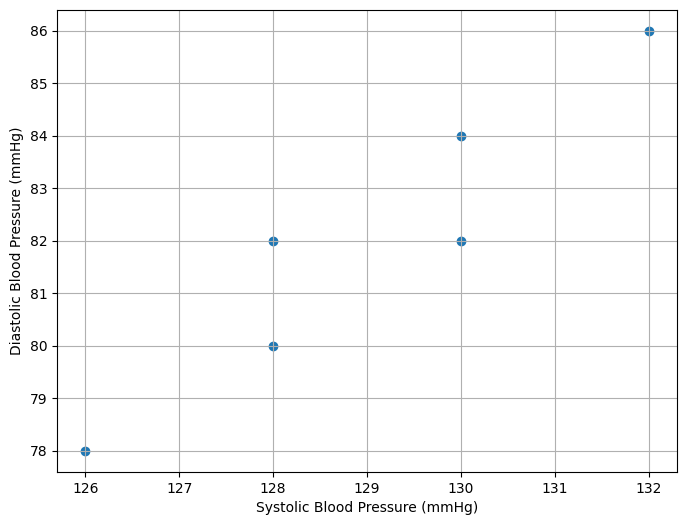

In [44]:
plt.figure(figsize=(8, 6))
plt.scatter(df.get('systolic_BP'), df.get('diastolic_BP'))

plt.grid(True)

plt.xlabel('Systolic Blood Pressure (mmHg)')
plt.ylabel('Diastolic Blood Pressure (mmHg)')

Normalizacja danych...

In [45]:
mean = df.mean()
std = df.std()


normalized_df = (df - mean) / std
print(normalized_df)

   systolic_BP  diastolic_BP
0    -1.430194     -1.414214
1    -0.476731     -0.707107
2    -0.476731      0.000000
3     0.476731      0.000000
4     0.476731      0.707107
5     1.430194      1.414214


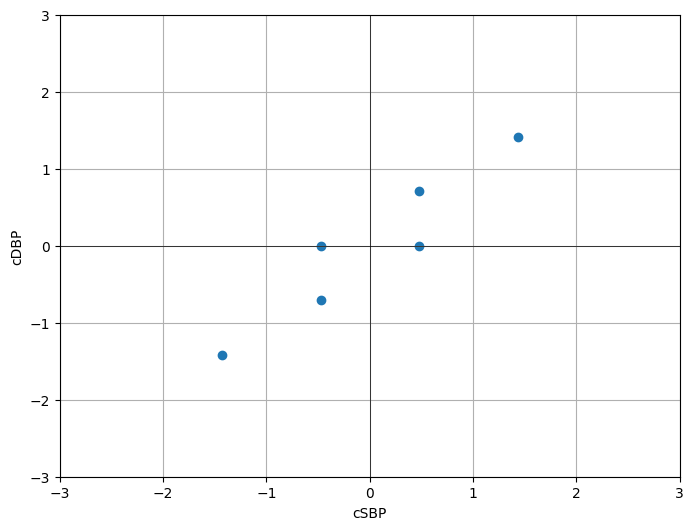

In [46]:
plt.figure(figsize=(8, 6))
plt.scatter(normalized_df.get('systolic_BP'),
            normalized_df.get('diastolic_BP'))
plt.xlabel('cSBP')
plt.ylabel('cDBP')

plt.xlim(-3, 3)
plt.ylim(-3, 3)

plt.grid(True)

plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)

In [47]:
var = normalized_df.var()
print('===== Variance =====')
print(var)
print('===== Covariance Matrix =====')
cov = normalized_df.cov()
print(cov)

===== Variance =====
systolic_BP     1.0
diastolic_BP    1.0
dtype: float64
===== Covariance Matrix =====
              systolic_BP  diastolic_BP
systolic_BP       1.00000       0.94388
diastolic_BP      0.94388       1.00000


In [48]:
matrix = cov.to_numpy()
w, v = np.linalg.eig(matrix
                     )
print('Printing the Eigen values of the given square array:\n',
      w)

print('\nPrinting Right eigenvectors of the given square array:\n',
      v)

Printing the Eigen values of the given square array:
 [0.05612019 1.94387981]

Printing Right eigenvectors of the given square array:
 [[-0.70710678 -0.70710678]
 [ 0.70710678 -0.70710678]]


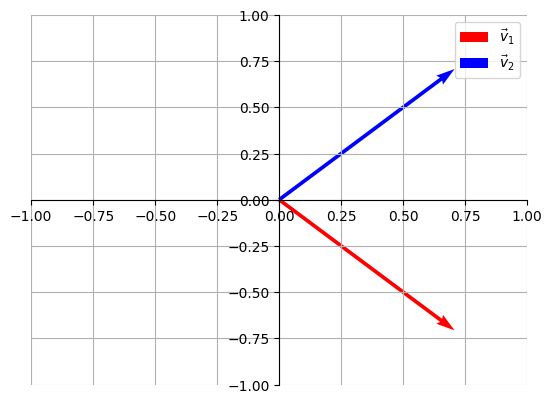

In [49]:
v1 = np.array([1.0, -1.0])
v2 = np.array([1.0, 1.0])

v1 = v1/np.linalg.norm(v1)
v2 = v2/np.linalg.norm(v2)

fig, ax = plt.subplots()

for spine in ['left', 'bottom']:
    ax.spines[spine].set_position('zero')
for spine in ['right', 'top']:
    ax.spines[spine].set_color('none')

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)

ax.quiver(0, 0, v1[0], v1[1], angles='xy', scale_units='xy',
          scale=1, color='red', label=r'$\vec{v}_1$')
ax.quiver(0, 0, v2[0], v2[1], angles='xy', scale_units='xy',
          scale=1, color='blue', label=r'$\vec{v}_2$')

ax.grid(True)
ax.legend()

plt.show()

In [50]:
eigen_vectors = np.array([v1, v2])
normalized_matrix = normalized_df.to_numpy()

D = np.dot(normalized_matrix, eigen_vectors)
print(D)

[[-2.01129979  0.01129979]
 [-0.83709993 -0.16290007]
 [-0.33709993  0.33709993]
 [ 0.33709993 -0.33709993]
 [ 0.83709993  0.16290007]
 [ 2.01129979 -0.01129979]]


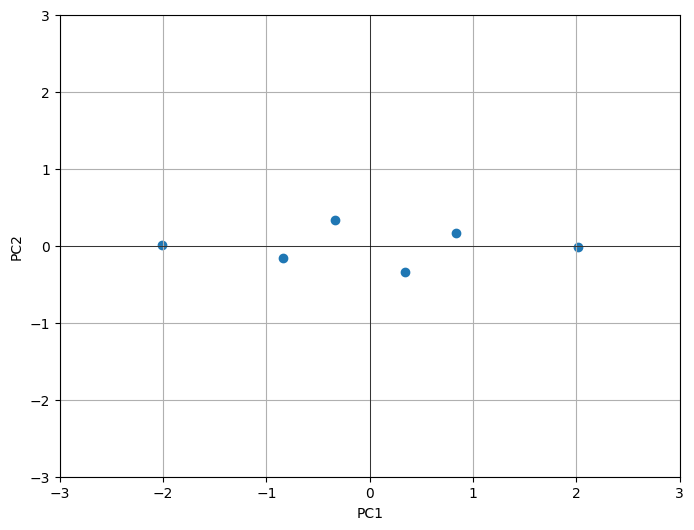

In [51]:
plt.figure(figsize=(8, 6))
plt.scatter(D[:, 0],
            D[:, 1])
plt.xlabel('PC1')
plt.ylabel('PC2')

plt.xlim(-3, 3)
plt.ylim(-3, 3)

plt.grid(True)

plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)

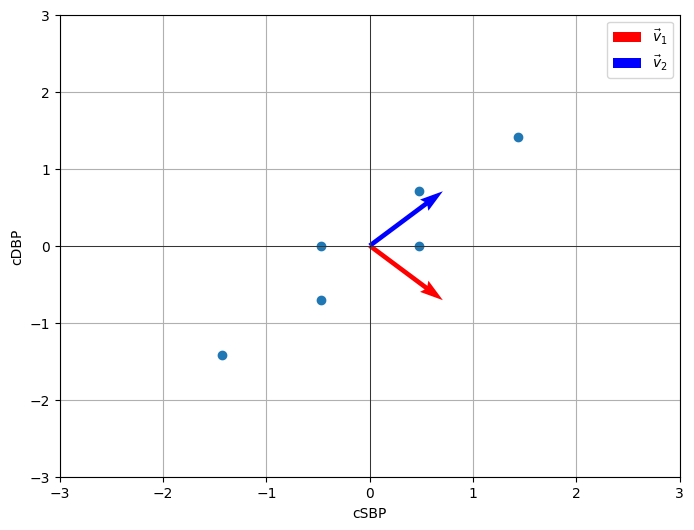

In [52]:
plt.figure(figsize=(8, 6))
plt.scatter(normalized_df.get('systolic_BP'),
            normalized_df.get('diastolic_BP'))
plt.xlabel('cSBP')
plt.ylabel('cDBP')


plt.xlim(-3, 3)
plt.ylim(-3, 3)


plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)


plt.quiver(0, 0, v1[0], v1[1], angles='xy', scale_units='xy',
           scale=1, color='red', label=r'$\vec{v}_1$')
plt.quiver(0, 0, v2[0], v2[1], angles='xy', scale_units='xy',
           scale=1, color='blue', label=r'$\vec{v}_2$')

plt.legend()

plt.show()

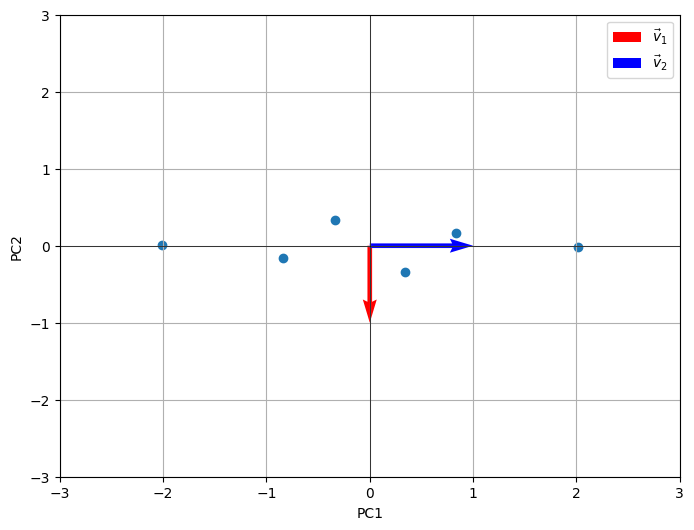

In [53]:
plt.figure(figsize=(8, 6))
plt.scatter(D[:, 0], D[:, 1])
plt.xlabel('PC1')
plt.ylabel('PC2')


plt.xlim(-3, 3)
plt.ylim(-3, 3)


plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)


plt.quiver(0, 0, 0, -1, angles='xy', scale_units='xy',
           scale=1, color='red', label=r'$\vec{v}_1$')
plt.quiver(0, 0, 1, 0, angles='xy', scale_units='xy',
           scale=1, color='blue', label=r'$\vec{v}_2$')

plt.legend()

plt.show()

In [54]:
solved_df = pd.DataFrame(D, columns=['PC1', 'PC2'])
print(solved_df)

      PC1     PC2
0 -2.0113  0.0113
1 -0.8371 -0.1629
2 -0.3371  0.3371
3  0.3371 -0.3371
4  0.8371  0.1629
5  2.0113 -0.0113


In [55]:
solved_cov = solved_df.cov()
solved_var = solved_df.var()

print('===== Variance =====')
print(solved_var)
print('===== Covariance Matrix =====')
print(solved_cov)

===== Variance =====
PC1    1.94388
PC2    0.05612
dtype: float64
===== Covariance Matrix =====
              PC1           PC2
PC1  1.943880e+00  5.555859e-17
PC2  5.555859e-17  5.612019e-02


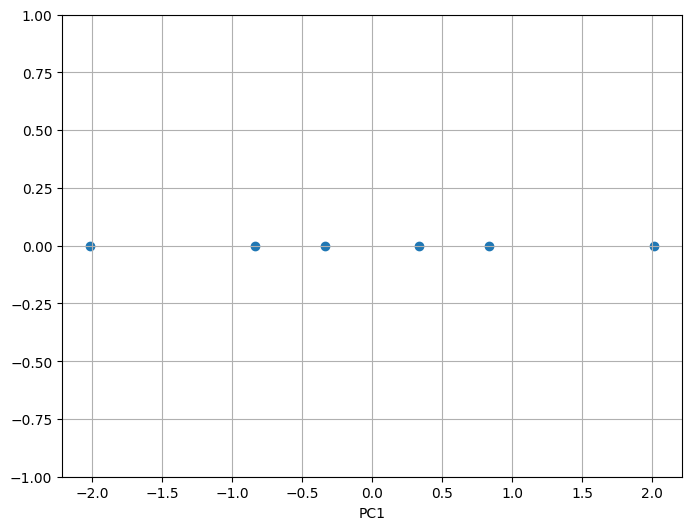

In [56]:
plt.figure(figsize=(8, 6))
plt.scatter(D[:, 0], np.zeros_like(D[:, 0]))
plt.xlabel('PC1')

plt.ylim(-1, 1)
plt.grid(True)

plt.show()